<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Reading-data-&amp;-dealing-with-NaNs" data-toc-modified-id="Reading-data-&amp;-dealing-with-NaNs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading data &amp; dealing with NaNs</a></span></li><li><span><a href="#Cluster-DBSCAN" data-toc-modified-id="Cluster-DBSCAN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cluster DBSCAN</a></span></li><li><span><a href="#Clusters-GMM-model" data-toc-modified-id="Clusters-GMM-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clusters GMM model</a></span></li><li><span><a href="#PCAs-to-visualize-clusters-with-all-data" data-toc-modified-id="PCAs-to-visualize-clusters-with-all-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PCAs to visualize clusters with all data</a></span></li><li><span><a href="#Analazing-clusters-with-all-data" data-toc-modified-id="Analazing-clusters-with-all-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analazing clusters with all data</a></span></li><li><span><a href="#Clusters-for-health-data" data-toc-modified-id="Clusters-for-health-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Clusters for health data</a></span></li><li><span><a href="#Clusters-for-economy-data" data-toc-modified-id="Clusters-for-economy-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Clusters for economy data</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [8]:
import plotly.express as px

In [9]:
from sklearn_extra.cluster import KMedoids

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
import matplotlib.cm as cm

In [12]:
import seaborn as sns

In [13]:
from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score

In [14]:
from sklearn.cluster import DBSCAN

# Reading data & dealing with NaNs

In [15]:
data = pd.read_csv('/Users/ewawesolowska/Documents/Data_Analytics/Final project/all_variables_dataframe')

In [16]:
data

,geo,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,Fruit_1-4_day,...,health_exp_2019,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019,Country
0,AT,48.0,52.2,4.3,4.6,6.0,7.5,21.8,35.8,58.7,...,4671.57,504.61,524.14,758.39,727.16,76.8,90.0,9.2,28094.0,Austria
1,BE,49.3,50.2,5.8,4.0,5.8,7.3,17.4,17.4,67.5,...,4418.10,297.55,312.96,585.15,562.24,70.5,90.0,12.8,24193.0,Belgium
2,BG,54.0,54.9,2.2,3.2,6.9,2.7,29.7,47.1,47.8,...,625.59,397.75,421.71,712.98,756.91,74.7,75.0,17.5,7051.0,Bulgaria
3,CY,48.3,49.8,4.0,2.9,7.0,4.7,18.9,33.2,58.8,...,1771.20,337.83,407.32,341.58,318.25,75.7,90.0,14.6,21492.0,Cyprus
4,CZ,56.8,60.0,4.6,2.2,8.8,4.4,26.3,48.2,44.1,...,1644.12,NaN,403.76,667.63,661.82,80.3,87.0,13.2,11996.0,Czechia
5,DE,52.1,53.5,8.0,5.9,8.7,11.6,26.2,33.2,55.9,...,4855.33,410.82,431.09,822.82,798.35,80.6,95.0,9.3,26128.0,Germany
6,DK,47.7,50.4,7.2,3.4,5.3,10.0,18.9,38.6,38.5,...,5355.06,387.74,419.44,268.88,261.17,78.3,95.0,10.0,33932.0,Denmark
7,EE,53.9,56.7,4.1,2.5,6.0,7.0,23.3,39.4,47.3,...,1425.95,335.88,348.34,489.53,453.49,80.2,90.0,11.6,13193.0,Estonia
8,EL,56.7,57.6,3.3,1.9,8.0,3.8,19.6,33.1,54.5,...,1340.82,NaN,NaN,423.78,419.77,61.2,79.0,20.7,10068.0,Greece
9,ES,52.4,53.7,4.1,2.7,7.5,5.7,19.3,23.4,65.7,...,2411.68,380.08,402.08,296.63,297.15,68.0,91.0,16.0,19135.0,Spain


In [17]:
data.isnull().sum()

geo                  0
Obesity_2014         0
Obesity_2019         0
asthma_2019          0
CHR_LW_RES_2019      0
DIAB_2019            0
DPR_CHR_2019         0
HBLPR_2019           0
Fruit_0_day          0
Fruit_1-4_day        0
Fruit_GE5            0
life_exp_2015        1
life_exp_2019        1
cr_death_rt_2014     0
cr_death_rt_2018     2
inf_mort_2014        0
inf_mort_2019        0
healthy_y_2014       0
healthy_y_2019       0
Poverty_risk_2015    0
Poverty_risk_2019    0
gro_disp_inc_2014    0
gro_disp_inc_2019    1
GDP_2014             1
GDP_2019             0
health_exp_2014      0
health_exp_2019      3
personnel_2014       5
personnel_2018       7
hosp_beds2014        0
hosp_beds2018        0
unempl2019           0
int_access2019       1
no_job_no_edu        0
income2019           0
Country              0
dtype: int64

There are information missing for EU_27 and for some countries. I will impute the values

In [18]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [19]:
data_num = data.iloc[:,1:35]

In [20]:
data_num

,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,Fruit_1-4_day,Fruit_GE5,...,health_exp_2014,health_exp_2019,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019
0,48.0,52.2,4.3,4.6,6.0,7.5,21.8,35.8,58.7,5.6,...,4041.59,4671.57,504.61,524.14,758.39,727.16,76.8,90.0,9.2,28094.0
1,49.3,50.2,5.8,4.0,5.8,7.3,17.4,17.4,67.5,15.1,...,3808.94,4418.10,297.55,312.96,585.15,562.24,70.5,90.0,12.8,24193.0
2,54.0,54.9,2.2,3.2,6.9,2.7,29.7,47.1,47.8,5.0,...,457.59,625.59,397.75,421.71,712.98,756.91,74.7,75.0,17.5,7051.0
3,48.3,49.8,4.0,2.9,7.0,4.7,18.9,33.2,58.8,7.9,...,1421.46,1771.20,337.83,407.32,341.58,318.25,75.7,90.0,14.6,21492.0
4,56.8,60.0,4.6,2.2,8.8,4.4,26.3,48.2,44.1,7.7,...,1139.09,1644.12,NaN,403.76,667.63,661.82,80.3,87.0,13.2,11996.0
5,52.1,53.5,8.0,5.9,8.7,11.6,26.2,33.2,55.9,10.9,...,3984.18,4855.33,410.82,431.09,822.82,798.35,80.6,95.0,9.3,26128.0
6,47.7,50.4,7.2,3.4,5.3,10.0,18.9,38.6,38.5,22.9,...,4790.05,5355.06,387.74,419.44,268.88,261.17,78.3,95.0,10.0,33932.0
7,53.9,56.7,4.1,2.5,6.0,7.0,23.3,39.4,47.3,13.3,...,933.47,1425.95,335.88,348.34,489.53,453.49,80.2,90.0,11.6,13193.0
8,56.7,57.6,3.3,1.9,8.0,3.8,19.6,33.1,54.5,12.4,...,1287.54,1340.82,NaN,NaN,423.78,419.77,61.2,79.0,20.7,10068.0
9,52.4,53.7,4.1,2.7,7.5,5.7,19.3,23.4,65.7,10.9,...,2018.39,2411.68,380.08,402.08,296.63,297.15,68.0,91.0,16.0,19135.0


In [21]:
imp.fit(data_num)

IterativeImputer(random_state=0)

In [22]:
IterativeImputer(random_state=0)

IterativeImputer(random_state=0)

In [23]:
data_imp = imp.transform(data.iloc[:,1:35])

In [24]:
data_imp1 = pd.DataFrame(data_imp)

In [25]:
data_imp1

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,48.0,52.2,4.3,4.6,6.0,7.5,21.8,35.8,58.7,5.6,...,4041.59,4671.570000,504.610000,524.140000,758.39,727.16,76.8,90.000000,9.2,28094.0
1,49.3,50.2,5.8,4.0,5.8,7.3,17.4,17.4,67.5,15.1,...,3808.94,4418.100000,297.550000,312.960000,585.15,562.24,70.5,90.000000,12.8,24193.0
2,54.0,54.9,2.2,3.2,6.9,2.7,29.7,47.1,47.8,5.0,...,457.59,625.590000,397.750000,421.710000,712.98,756.91,74.7,75.000000,17.5,7051.0
3,48.3,49.8,4.0,2.9,7.0,4.7,18.9,33.2,58.8,7.9,...,1421.46,1771.200000,337.830000,407.320000,341.58,318.25,75.7,90.000000,14.6,21492.0
4,56.8,60.0,4.6,2.2,8.8,4.4,26.3,48.2,44.1,7.7,...,1139.09,1644.120000,362.834655,403.760000,667.63,661.82,80.3,87.000000,13.2,11996.0
5,52.1,53.5,8.0,5.9,8.7,11.6,26.2,33.2,55.9,10.9,...,3984.18,4855.330000,410.820000,431.090000,822.82,798.35,80.6,95.000000,9.3,26128.0
6,47.7,50.4,7.2,3.4,5.3,10.0,18.9,38.6,38.5,22.9,...,4790.05,5355.060000,387.740000,419.440000,268.88,261.17,78.3,95.000000,10.0,33932.0
7,53.9,56.7,4.1,2.5,6.0,7.0,23.3,39.4,47.3,13.3,...,933.47,1425.950000,335.880000,348.340000,489.53,453.49,80.2,90.000000,11.6,13193.0
8,56.7,57.6,3.3,1.9,8.0,3.8,19.6,33.1,54.5,12.4,...,1287.54,1340.820000,357.798241,377.496009,423.78,419.77,61.2,79.000000,20.7,10068.0
9,52.4,53.7,4.1,2.7,7.5,5.7,19.3,23.4,65.7,10.9,...,2018.39,2411.680000,380.080000,402.080000,296.63,297.15,68.0,91.000000,16.0,19135.0


In [26]:
new_data = pd.concat([data[['geo', 'Country']], data_imp1.reindex(data.index)], axis=1)

In [27]:
new_data

,geo,Country,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,AT,Austria,48.0,52.2,4.3,4.6,6.0,7.5,21.8,35.8,...,4041.59,4671.570000,504.610000,524.140000,758.39,727.16,76.8,90.000000,9.2,28094.0
1,BE,Belgium,49.3,50.2,5.8,4.0,5.8,7.3,17.4,17.4,...,3808.94,4418.100000,297.550000,312.960000,585.15,562.24,70.5,90.000000,12.8,24193.0
2,BG,Bulgaria,54.0,54.9,2.2,3.2,6.9,2.7,29.7,47.1,...,457.59,625.590000,397.750000,421.710000,712.98,756.91,74.7,75.000000,17.5,7051.0
3,CY,Cyprus,48.3,49.8,4.0,2.9,7.0,4.7,18.9,33.2,...,1421.46,1771.200000,337.830000,407.320000,341.58,318.25,75.7,90.000000,14.6,21492.0
4,CZ,Czechia,56.8,60.0,4.6,2.2,8.8,4.4,26.3,48.2,...,1139.09,1644.120000,362.834655,403.760000,667.63,661.82,80.3,87.000000,13.2,11996.0
5,DE,Germany,52.1,53.5,8.0,5.9,8.7,11.6,26.2,33.2,...,3984.18,4855.330000,410.820000,431.090000,822.82,798.35,80.6,95.000000,9.3,26128.0
6,DK,Denmark,47.7,50.4,7.2,3.4,5.3,10.0,18.9,38.6,...,4790.05,5355.060000,387.740000,419.440000,268.88,261.17,78.3,95.000000,10.0,33932.0
7,EE,Estonia,53.9,56.7,4.1,2.5,6.0,7.0,23.3,39.4,...,933.47,1425.950000,335.880000,348.340000,489.53,453.49,80.2,90.000000,11.6,13193.0
8,EL,Greece,56.7,57.6,3.3,1.9,8.0,3.8,19.6,33.1,...,1287.54,1340.820000,357.798241,377.496009,423.78,419.77,61.2,79.000000,20.7,10068.0
9,ES,Spain,52.4,53.7,4.1,2.7,7.5,5.7,19.3,23.4,...,2018.39,2411.680000,380.080000,402.080000,296.63,297.15,68.0,91.000000,16.0,19135.0


In [28]:
data.columns[2:]

Index(['Obesity_2019', 'asthma_2019', 'CHR_LW_RES_2019', 'DIAB_2019',
       'DPR_CHR_2019', 'HBLPR_2019', 'Fruit_0_day', 'Fruit_1-4_day',
       'Fruit_GE5', 'life_exp_2015', 'life_exp_2019', 'cr_death_rt_2014',
       'cr_death_rt_2018', 'inf_mort_2014', 'inf_mort_2019', 'healthy_y_2014',
       'healthy_y_2019', 'Poverty_risk_2015', 'Poverty_risk_2019',
       'gro_disp_inc_2014', 'gro_disp_inc_2019', 'GDP_2014', 'GDP_2019',
       'health_exp_2014', 'health_exp_2019', 'personnel_2014',
       'personnel_2018', 'hosp_beds2014', 'hosp_beds2018', 'unempl2019',
       'int_access2019', 'no_job_no_edu', 'income2019', 'Country'],
      dtype='object')

In [29]:
column_names = ['geo', 'Country'] + list(data.columns[1:35])

In [30]:
new_data.columns = column_names

In [31]:
new_data

,geo,Country,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,...,health_exp_2014,health_exp_2019,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019
0,AT,Austria,48.0,52.2,4.3,4.6,6.0,7.5,21.8,35.8,...,4041.59,4671.570000,504.610000,524.140000,758.39,727.16,76.8,90.000000,9.2,28094.0
1,BE,Belgium,49.3,50.2,5.8,4.0,5.8,7.3,17.4,17.4,...,3808.94,4418.100000,297.550000,312.960000,585.15,562.24,70.5,90.000000,12.8,24193.0
2,BG,Bulgaria,54.0,54.9,2.2,3.2,6.9,2.7,29.7,47.1,...,457.59,625.590000,397.750000,421.710000,712.98,756.91,74.7,75.000000,17.5,7051.0
3,CY,Cyprus,48.3,49.8,4.0,2.9,7.0,4.7,18.9,33.2,...,1421.46,1771.200000,337.830000,407.320000,341.58,318.25,75.7,90.000000,14.6,21492.0
4,CZ,Czechia,56.8,60.0,4.6,2.2,8.8,4.4,26.3,48.2,...,1139.09,1644.120000,362.834655,403.760000,667.63,661.82,80.3,87.000000,13.2,11996.0
5,DE,Germany,52.1,53.5,8.0,5.9,8.7,11.6,26.2,33.2,...,3984.18,4855.330000,410.820000,431.090000,822.82,798.35,80.6,95.000000,9.3,26128.0
6,DK,Denmark,47.7,50.4,7.2,3.4,5.3,10.0,18.9,38.6,...,4790.05,5355.060000,387.740000,419.440000,268.88,261.17,78.3,95.000000,10.0,33932.0
7,EE,Estonia,53.9,56.7,4.1,2.5,6.0,7.0,23.3,39.4,...,933.47,1425.950000,335.880000,348.340000,489.53,453.49,80.2,90.000000,11.6,13193.0
8,EL,Greece,56.7,57.6,3.3,1.9,8.0,3.8,19.6,33.1,...,1287.54,1340.820000,357.798241,377.496009,423.78,419.77,61.2,79.000000,20.7,10068.0
9,ES,Spain,52.4,53.7,4.1,2.7,7.5,5.7,19.3,23.4,...,2018.39,2411.680000,380.080000,402.080000,296.63,297.15,68.0,91.000000,16.0,19135.0


In [32]:
new_data.to_csv('df_master_final',index=False)

In [33]:
data_num = new_data.iloc[:,2:]


In [34]:
scaler = StandardScaler()

In [35]:
scaled_data = scaler.fit_transform(data_num)

In [36]:
scaled_data

array([[-1.27135400e+00, -5.96123881e-01, -4.87321098e-01,
         6.47228043e-01, -6.16331997e-01,  1.19166572e-01,
        -1.75129657e-01, -6.64713852e-02,  7.15385012e-01,
        -9.74101302e-01,  4.14228918e-01,  3.95193777e-01,
        -4.25738498e-01, -5.14706799e-01, -4.80969380e-01,
        -4.76275364e-01, -8.34505295e-01, -1.00521240e+00,
        -9.56550364e-01, -8.13709228e-01, -1.69961076e-01,
        -9.78747040e-01, -2.28161174e-01, -2.29233127e-01,
         1.13302805e+00,  1.16622041e+00,  2.86689983e+00,
         2.81284941e+00,  1.47669688e+00,  1.39226723e+00,
         4.54832771e-01,  2.59316721e-01, -8.96407046e-01,
         8.78552878e-01],
       [-9.32822284e-01, -1.01236998e+00,  3.37980761e-01,
         2.50387491e-01, -7.28029706e-01,  5.90464998e-02,
        -9.04047690e-01, -1.71291646e+00,  1.55477009e+00,
         4.16725034e-01,  3.50864893e-01,  4.27568597e-01,
        -3.20626290e-01, -4.11469327e-01, -2.11626527e-01,
         1.98950468e-01,  5.29

Nizej trzeba wyczyscic nazwy kolumn i danych

In [37]:
new_data1 = pd.concat([new_data[['geo', 'Country']], data_imp1.reindex(data.index)], axis=1)

In [38]:
new_data1.columns = new_data.columns

In [39]:
scaled_data = pd.DataFrame(scaled_data)

In [40]:
data_after_scaling = pd.concat([new_data[['geo', 'Country']], scaled_data.reindex(new_data.index)], axis=1)

In [41]:
data_after_scaling

,geo,Country,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,AT,Austria,-1.271354,-0.596124,-0.487321,0.647228,-0.616332,0.119167,-0.175130,-0.066471,...,1.133028,1.166220,2.866900,2.812849,1.476697,1.392267,0.454833,0.259317,-0.896407,0.878553
1,BE,Belgium,-0.932822,-1.012370,0.337981,0.250387,-0.728030,0.059046,-0.904048,-1.712916,...,0.982242,1.013643,-0.898193,-1.079331,0.425292,0.392381,-0.806685,0.259317,-0.006182,0.490378
2,BG,Bulgaria,0.291100,-0.034192,-1.642744,-0.278733,-0.113692,-1.323715,1.133610,0.944661,...,-1.189855,-1.269275,0.923802,0.925000,1.201101,1.572637,0.034327,-2.206385,1.156056,-1.215361
3,CY,Cyprus,-1.193231,-1.095619,-0.652381,-0.477154,-0.057843,-0.722514,-0.655553,-0.299121,...,-0.565146,-0.579670,-0.165758,0.659783,-1.052950,-1.086894,0.234568,0.259317,0.438930,0.221611
4,CZ,Czechia,1.020245,1.027236,-0.322261,-0.940134,0.947436,-0.812695,0.570355,1.043089,...,-0.748157,-0.656166,0.288916,0.594170,0.925868,0.996120,1.155676,-0.233824,0.092732,-0.723302
5,DE,Germany,-0.203677,-0.325564,1.548423,1.507049,0.891587,1.351628,0.553788,-0.299121,...,1.095819,1.276836,1.161462,1.097879,1.867727,1.823882,1.215748,1.081217,-0.871679,0.682923
6,DK,Denmark,-1.349477,-0.970745,1.108262,-0.146453,-1.007274,0.870667,-0.655553,0.184075,...,1.618124,1.577650,0.741785,0.883163,-1.494171,-1.432962,0.755194,1.081217,-0.698579,1.459471
7,EE,Estonia,0.265059,0.340430,-0.597361,-0.741714,-0.616332,-0.031134,0.073365,0.255659,...,-0.881425,-0.787495,-0.201216,-0.427255,-0.155032,-0.266954,1.135652,0.259317,-0.302924,-0.604192
8,EL,Greece,0.994204,0.527741,-1.037522,-1.138554,0.500645,-0.993055,-0.539589,-0.308069,...,-0.651943,-0.838739,0.197336,0.110108,-0.554073,-0.471393,-2.668924,-1.548864,1.947367,-0.915150
9,ES,Spain,-0.125554,-0.283939,-0.597361,-0.609434,0.221401,-0.421914,-0.589288,-1.176032,...,-0.178260,-0.194130,0.602498,0.563207,-1.325755,-1.214820,-1.307287,0.423697,0.785129,-0.012925


In [42]:
data_after_scaling.columns = new_data.columns

In [43]:
data_after_scaling_num = data_after_scaling.iloc[:,2:]

In [44]:
data_after_scaling_num

,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,Fruit_1-4_day,Fruit_GE5,...,health_exp_2014,health_exp_2019,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019
0,-1.271354,-0.596124,-0.487321,0.647228,-0.616332,0.119167,-0.175130,-0.066471,0.715385,-0.974101,...,1.133028,1.166220,2.866900,2.812849,1.476697,1.392267,0.454833,0.259317,-0.896407,0.878553
1,-0.932822,-1.012370,0.337981,0.250387,-0.728030,0.059046,-0.904048,-1.712916,1.554770,0.416725,...,0.982242,1.013643,-0.898193,-1.079331,0.425292,0.392381,-0.806685,0.259317,-0.006182,0.490378
2,0.291100,-0.034192,-1.642744,-0.278733,-0.113692,-1.323715,1.133610,0.944661,-0.324308,-1.061943,...,-1.189855,-1.269275,0.923802,0.925000,1.201101,1.572637,0.034327,-2.206385,1.156056,-1.215361
3,-1.193231,-1.095619,-0.652381,-0.477154,-0.057843,-0.722514,-0.655553,-0.299121,0.724923,-0.637375,...,-0.565146,-0.579670,-0.165758,0.659783,-1.052950,-1.086894,0.234568,0.259317,0.438930,0.221611
4,1.020245,1.027236,-0.322261,-0.940134,0.947436,-0.812695,0.570355,1.043089,-0.677231,-0.666655,...,-0.748157,-0.656166,0.288916,0.594170,0.925868,0.996120,1.155676,-0.233824,0.092732,-0.723302
5,-0.203677,-0.325564,1.548423,1.507049,0.891587,1.351628,0.553788,-0.299121,0.448308,-0.198167,...,1.095819,1.276836,1.161462,1.097879,1.867727,1.823882,1.215748,1.081217,-0.871679,0.682923
6,-1.349477,-0.970745,1.108262,-0.146453,-1.007274,0.870667,-0.655553,0.184075,-1.211385,1.558667,...,1.618124,1.577650,0.741785,0.883163,-1.494171,-1.432962,0.755194,1.081217,-0.698579,1.459471
7,0.265059,0.340430,-0.597361,-0.741714,-0.616332,-0.031134,0.073365,0.255659,-0.372000,0.153200,...,-0.881425,-0.787495,-0.201216,-0.427255,-0.155032,-0.266954,1.135652,0.259317,-0.302924,-0.604192
8,0.994204,0.527741,-1.037522,-1.138554,0.500645,-0.993055,-0.539589,-0.308069,0.314769,0.021438,...,-0.651943,-0.838739,0.197336,0.110108,-0.554073,-0.471393,-2.668924,-1.548864,1.947367,-0.915150
9,-0.125554,-0.283939,-0.597361,-0.609434,0.221401,-0.421914,-0.589288,-1.176032,1.383078,-0.198167,...,-0.178260,-0.194130,0.602498,0.563207,-1.325755,-1.214820,-1.307287,0.423697,0.785129,-0.012925


In [45]:
data_after_scaling

,geo,Country,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,...,health_exp_2014,health_exp_2019,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019
0,AT,Austria,-1.271354,-0.596124,-0.487321,0.647228,-0.616332,0.119167,-0.175130,-0.066471,...,1.133028,1.166220,2.866900,2.812849,1.476697,1.392267,0.454833,0.259317,-0.896407,0.878553
1,BE,Belgium,-0.932822,-1.012370,0.337981,0.250387,-0.728030,0.059046,-0.904048,-1.712916,...,0.982242,1.013643,-0.898193,-1.079331,0.425292,0.392381,-0.806685,0.259317,-0.006182,0.490378
2,BG,Bulgaria,0.291100,-0.034192,-1.642744,-0.278733,-0.113692,-1.323715,1.133610,0.944661,...,-1.189855,-1.269275,0.923802,0.925000,1.201101,1.572637,0.034327,-2.206385,1.156056,-1.215361
3,CY,Cyprus,-1.193231,-1.095619,-0.652381,-0.477154,-0.057843,-0.722514,-0.655553,-0.299121,...,-0.565146,-0.579670,-0.165758,0.659783,-1.052950,-1.086894,0.234568,0.259317,0.438930,0.221611
4,CZ,Czechia,1.020245,1.027236,-0.322261,-0.940134,0.947436,-0.812695,0.570355,1.043089,...,-0.748157,-0.656166,0.288916,0.594170,0.925868,0.996120,1.155676,-0.233824,0.092732,-0.723302
5,DE,Germany,-0.203677,-0.325564,1.548423,1.507049,0.891587,1.351628,0.553788,-0.299121,...,1.095819,1.276836,1.161462,1.097879,1.867727,1.823882,1.215748,1.081217,-0.871679,0.682923
6,DK,Denmark,-1.349477,-0.970745,1.108262,-0.146453,-1.007274,0.870667,-0.655553,0.184075,...,1.618124,1.577650,0.741785,0.883163,-1.494171,-1.432962,0.755194,1.081217,-0.698579,1.459471
7,EE,Estonia,0.265059,0.340430,-0.597361,-0.741714,-0.616332,-0.031134,0.073365,0.255659,...,-0.881425,-0.787495,-0.201216,-0.427255,-0.155032,-0.266954,1.135652,0.259317,-0.302924,-0.604192
8,EL,Greece,0.994204,0.527741,-1.037522,-1.138554,0.500645,-0.993055,-0.539589,-0.308069,...,-0.651943,-0.838739,0.197336,0.110108,-0.554073,-0.471393,-2.668924,-1.548864,1.947367,-0.915150
9,ES,Spain,-0.125554,-0.283939,-0.597361,-0.609434,0.221401,-0.421914,-0.589288,-1.176032,...,-0.178260,-0.194130,0.602498,0.563207,-1.325755,-1.214820,-1.307287,0.423697,0.785129,-0.012925


# Cluster DBSCAN

In [46]:
#X = data_after_scaling_num

In [47]:
#clustering = DBSCAN(eps=4, min_samples=2).fit(X)



In [48]:
#Y = clustering.labels_

In [49]:
#Y

In [50]:
#data_after_scaling['DBSCAn']=Y

In [51]:
#data_after_scaling[data_after_scaling['DBSCAn'] == 3]

# Clusters GMM model

In [52]:
# Create empty list
#S=[]

In [53]:
# Range of clusters to try (2 to 10)
#K=range(2,11)

In [54]:
# Select data for clustering model
#X = data_after_scaling_num

In [55]:
'''for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()'''

"for k in K:\n    # Set the model and its parameters\n    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')\n    # Fit the model \n    labels = model.fit_predict(X)\n    # Calculate Silhoutte Score and append to a list\n    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))\n\n# Plot the resulting Silhouette scores on a graph\nplt.figure(figsize=(16,8), dpi=300)\nplt.plot(K, S, 'bo-', color='black')\nplt.xlabel('k')\nplt.ylabel('Silhouette Score')\nplt.title('Identify the number of clusters using Silhouette Score')\nplt.show()"

In [57]:
#range_n_clusters = [2, 3, 4, 5]

'''for n_clusters in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_after_scaling_num) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    cluster_labels = clusterer.fit_predict(data_after_scaling_num)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_after_scaling_num, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_after_scaling_num, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_after_scaling_num.iloc[:,1], data_after_scaling_num.iloc[:,8], marker ='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Detergents_Paper")
    ax2.set_ylabel("Grocery")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')'''

'for n_clusters in K:\n    # Create a subplot with 1 row and 2 columns\n    fig, (ax1, ax2) = plt.subplots(1, 2)\n    fig.set_size_inches(18, 7)\n\n    # The 1st subplot is the silhouette plot\n    # The silhouette coefficient can range from -1, 1 but in this example all\n    # lie within [-0.1, 1]\n    ax1.set_xlim([-0.1, 1])\n    # The (n_clusters+1)*10 is for inserting blank space between silhouette\n    # plots of individual clusters, to demarcate them clearly.\n    ax1.set_ylim([0, len(data_after_scaling_num) + (n_clusters + 1) * 10])\n\n    # Initialize the clusterer with n_clusters value and a random generator\n    # seed of 10 for reproducibility.\n    clusterer = GaussianMixture(n_components=k, n_init=20, init_params=\'kmeans\')\n    cluster_labels = clusterer.fit_predict(data_after_scaling_num)\n\n    # The silhouette_score gives the average value for all the samples.\n    # This gives a perspective into the density and separation of the formed\n    # clusters\n    silhouette

4 clusters is the best choice

In [58]:
# Set the model and its parameters - 3 clusters
'''model4 = GaussianMixture(n_components=4, # this is the number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=1, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=1 # for reproducibility
                        )'''


"model4 = GaussianMixture(n_components=4, # this is the number of clusters\n                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’\n                         max_iter=100, # the number of EM iterations to perform. default=100\n                         n_init=1, # the number of initializations to perform. default = 1\n                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}\n                         verbose=0, # default 0, {0,1,2}\n                         random_state=1 # for reproducibility\n                        )"

In [59]:
# Fit the model and predict labels
#clust4 = model4.fit(X)
#labels4GMM = model4.predict(X)

In [60]:
#data_after_scaling['GMM_labels']=labels4GMM

In [61]:
#data_after_scaling[data_after_scaling['GMM_labels'] == 3]

In [62]:
# Clusters K medoids

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.213008687224818
For n_clusters = 3 The average silhouette_score is : 0.09370126317206548
For n_clusters = 4 The average silhouette_score is : 0.10376816290222306
For n_clusters = 5 The average silhouette_score is : 0.067350215191546


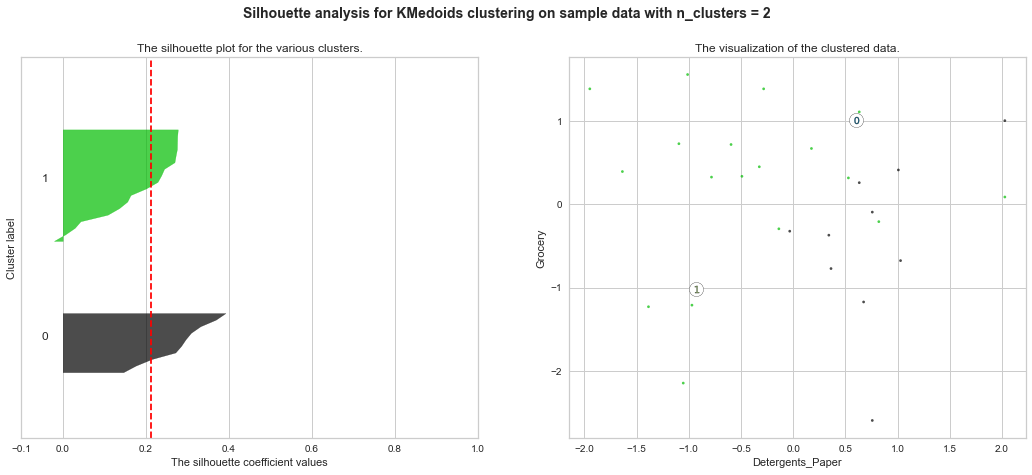

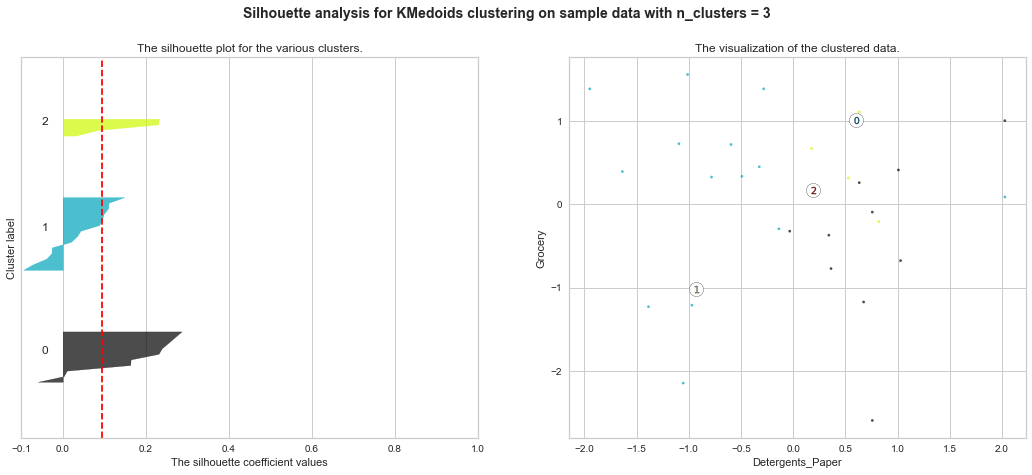

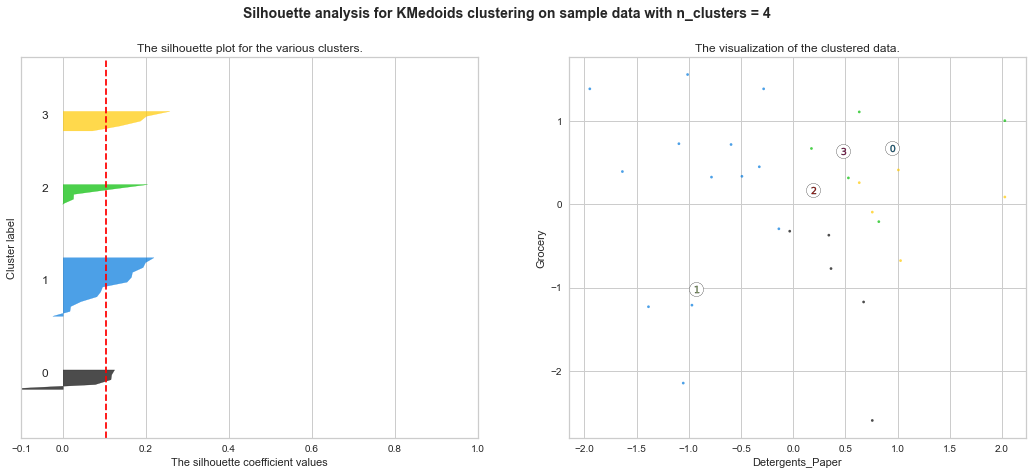

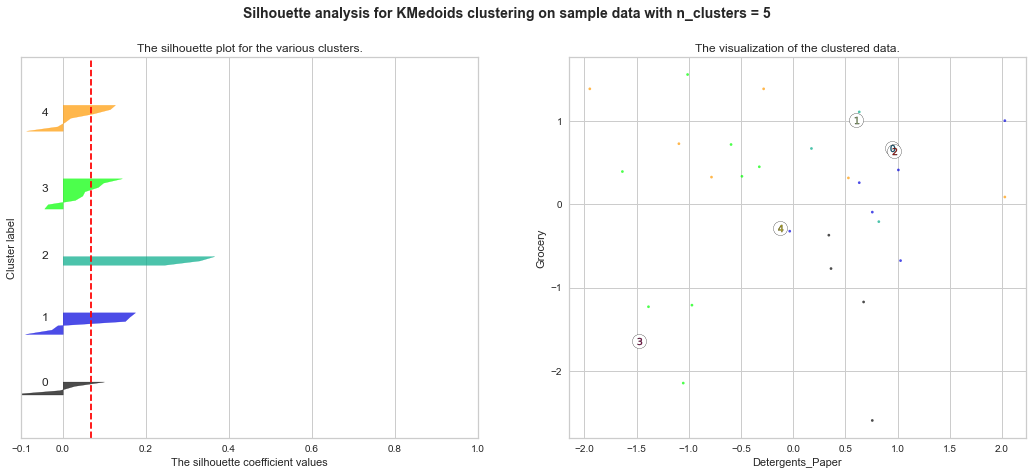

In [63]:

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_after_scaling_num) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data_after_scaling_num)
    
    #clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    #q, mod = divmod(i, 2)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_after_scaling_num, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_after_scaling_num, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_after_scaling_num.iloc[:,1], data_after_scaling_num.iloc[:,8], marker ='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Detergents_Paper")
    ax2.set_ylabel("Grocery")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

 **Based on the silhouette plots, I chose 4 clusters**

In [65]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(data_after_scaling_num)
kmedoids.labels_

array([1, 1, 0, 1, 3, 1, 1, 0, 2, 1, 1, 2, 1, 2, 3, 1, 1, 0, 1, 0, 3, 1,
       3, 2, 0, 1, 2, 3])

In [66]:
data_after_scaling['KMedoids_labels']=kmedoids.labels_

In [67]:
data_after_scaling[data_after_scaling.KMedoids_labels == 3]

,geo,Country,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,...,health_exp_2019,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019,KMedoids_labels
4,CZ,Czechia,1.020245,1.027236,-0.322261,-0.940134,0.947436,-0.812695,0.570355,1.043089,...,-0.656166,0.288916,0.594170,0.925868,0.996120,1.155676,-0.233824,0.092732,-0.723302,3
14,HU,Hungary,0.603591,1.006424,-0.102180,0.382668,1.003285,-0.932935,1.431803,-0.021731,...,-1.074344,-0.265404,-0.611009,1.112796,1.197710,0.154472,-0.398204,0.438930,-1.174862,3
20,MT,Malta,2.113963,2.026227,0.448021,-1.998376,0.221401,-1.083235,-0.788083,-0.012783,...,-0.349871,0.244100,0.473450,-0.341170,-0.404278,0.454833,-0.398204,-0.797493,-0.196515,3
22,PL,Poland,0.473386,0.631802,-0.597361,-0.609434,0.556494,-0.872815,0.603487,0.085646,...,-0.995390,-2.114129,-1.926705,0.895948,0.946829,-0.306082,-0.233824,0.142189,-0.989879,3
27,SK,Slovakia,0.343182,0.756676,-0.652381,-0.477154,0.277250,-0.842755,0.918247,0.425673,...,-0.924692,-0.229539,-0.064365,0.385054,0.437125,-0.225986,-1.055724,1.081871,-0.934952,3


# PCAs to visualize clusters with all data

In [68]:
#Instantiate the PCA object
pca_3 = PCA(n_components=3) 
pca_3

PCA(n_components=3)

In [69]:
# Fit the model with the data
pca_3.fit(data_after_scaling.iloc[:,2:]) 
pca_3

PCA(n_components=3)

In [70]:
X_pca_3 = pca_3.transform(data_after_scaling.iloc[:,2:])
print('\nShape of original_data:', data_after_scaling.iloc[:,2:].shape)
print('Shape of X_pca_3:', X_pca_3.shape)


Shape of original_data: (28, 35)
Shape of X_pca_3: (28, 3)


In [71]:
total_var = pca_3.explained_variance_ratio_.sum() * 100

In [72]:
total_var

56.472557706332694

In [73]:
from sklearn.decomposition import PCA
x = np.cumsum(pca_3.explained_variance_ratio_)
for i in range(len(x)):
    print('Accumulated variance ratio at PCA',i,"=",round(x[i]*100,2),"%")

Accumulated variance ratio at PCA 0 = 32.73 %
Accumulated variance ratio at PCA 1 = 45.4 %
Accumulated variance ratio at PCA 2 = 56.47 %


In [74]:
X_pca_3 = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3'])

In [75]:
data_after_scaling.columns

Index(['geo', 'Country', 'Obesity_2014', 'Obesity_2019', 'asthma_2019',
       'CHR_LW_RES_2019', 'DIAB_2019', 'DPR_CHR_2019', 'HBLPR_2019',
       'Fruit_0_day', 'Fruit_1-4_day', 'Fruit_GE5', 'life_exp_2015',
       'life_exp_2019', 'cr_death_rt_2014', 'cr_death_rt_2018',
       'inf_mort_2014', 'inf_mort_2019', 'healthy_y_2014', 'healthy_y_2019',
       'Poverty_risk_2015', 'Poverty_risk_2019', 'gro_disp_inc_2014',
       'gro_disp_inc_2019', 'GDP_2014', 'GDP_2019', 'health_exp_2014',
       'health_exp_2019', 'personnel_2014', 'personnel_2018', 'hosp_beds2014',
       'hosp_beds2018', 'unempl2019', 'int_access2019', 'no_job_no_edu',
       'income2019', 'KMedoids_labels'],
      dtype='object')

In [76]:
X_pca_3['geo'] = data_after_scaling['geo']

In [78]:
X_pca_3['KMedoids_labels']= data_after_scaling['KMedoids_labels']

In [79]:
X_pca_3.KMedoids_labels = X_pca_3.KMedoids_labels.astype('str')

In [80]:
fig = px.scatter_3d(X_pca_3, x='PC1', y='PC2', z='PC3', color='KMedoids_labels', text = 'geo', title= 'PC1, PC2 and PC3 representation in "Clusters" variable')

fig.show()

# Analazing clusters with all data

In [81]:
count_cluster0 = list(data_after_scaling[data_after_scaling.KMedoids_labels == 0]['Country'])

In [82]:
count_cluster0

['Bulgaria', 'Estonia', 'Lithuania', 'Latvia', 'Romania']

In [83]:
count_cluster1 = list(data_after_scaling[data_after_scaling.KMedoids_labels == 1]['Country'])

In [ ]:
count_cluster1

In [84]:
count_cluster2 = list(data_after_scaling[data_after_scaling.KMedoids_labels == 2]['Country'])

In [ ]:
count_cluster2

In [85]:
count_cluster3 = list(data_after_scaling[data_after_scaling.KMedoids_labels == 3]['Country'])

In [86]:
count_cluster3

['Czechia', 'Hungary', 'Malta', 'Poland', 'Slovakia']

<AxesSubplot:>

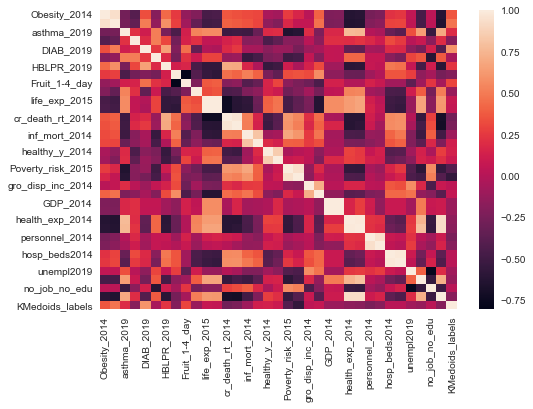

In [87]:
sns.heatmap(data_after_scaling.iloc[:,2:].corr())

# Clusters for health data 

In [88]:
health = ['Obesity_2014', 'Obesity_2019', 'asthma_2019', 'CHR_LW_RES_2019',
       'DIAB_2019', 'DPR_CHR_2019', 'HBLPR_2019', 'Fruit_0_day',
       'Fruit_1-4_day', 'Fruit_GE5', 'life_exp_2015', 'life_exp_2019',
       'cr_death_rt_2014', 'cr_death_rt_2018', 'inf_mort_2014',
       'inf_mort_2019', 'healthy_y_2014', 'healthy_y_2019']

In [89]:
economy = ['Poverty_risk_2015', 'Poverty_risk_2019', 'gro_disp_inc_2014',
       'gro_disp_inc_2019', 'GDP_2014', 'GDP_2019', 'health_exp_2014',
       'health_exp_2019', 'personnel_2014', 'personnel_2018', 'hosp_beds2014',
       'hosp_beds2018', 'unempl2019', 'int_access2019', 'no_job_no_edu',
       'income2019']

In [90]:
data_health = data_after_scaling[health]

In [91]:
# Create empty list
#S1=[]

In [92]:
# Range of clusters to try (2 to 10)
#K=range(2,11)

In [93]:
# Select data for clustering model
#X1 = data_health

In [ ]:
'''for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X1)
    # Calculate Silhoutte Score and append to a list
    S1.append(metrics.silhouette_score(X1, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S1, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()'''

In [ ]:
#range_n_clusters = [2, 3, 4, 5]

'''for n_clusters in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1.iloc[:,1], X1.iloc[:,8], marker ='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Detergents_Paper")
    ax2.set_ylabel("Grocery")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')'''

In [ ]:
# 4 clusters is the best choice

In [94]:
# Set the model and its parameters - 3 clusters
'''model4H = GaussianMixture(n_components=4, # this is the number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=1, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=1 # for reproducibility
                        )
'''

"model4H = GaussianMixture(n_components=4, # this is the number of clusters\n                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’\n                         max_iter=100, # the number of EM iterations to perform. default=100\n                         n_init=1, # the number of initializations to perform. default = 1\n                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}\n                         verbose=0, # default 0, {0,1,2}\n                         random_state=1 # for reproducibility\n                        )\n"

In [95]:
# Fit the model and predict labels
'''clust4H = model4H.fit(X1)
labels4GMM_H = model4H.predict(X1)'''

'clust4H = model4H.fit(X1)\nlabels4GMM_H = model4H.predict(X1)'

In [ ]:
#data_after_scaling['GMM_health']=labels4GMM_H

In [ ]:
#data_after_scaling[data_after_scaling['GMM_health']==3]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.20864684673860845
For n_clusters = 3 The average silhouette_score is : 0.10107766312766324
For n_clusters = 4 The average silhouette_score is : 0.07800539119153485
For n_clusters = 5 The average silhouette_score is : 0.03374239682554193


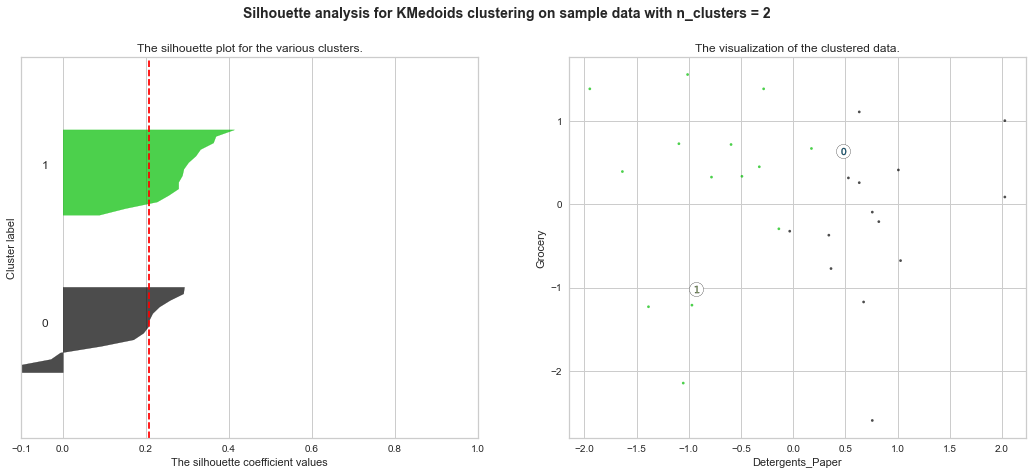

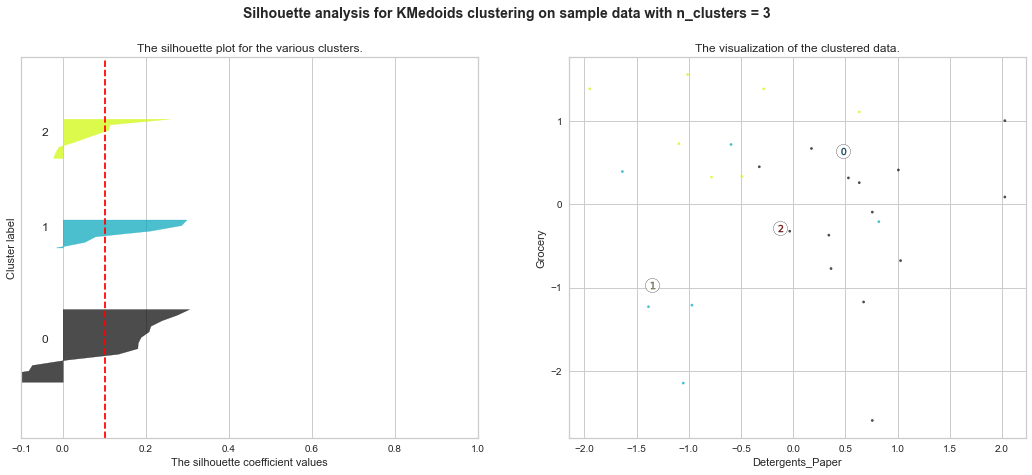

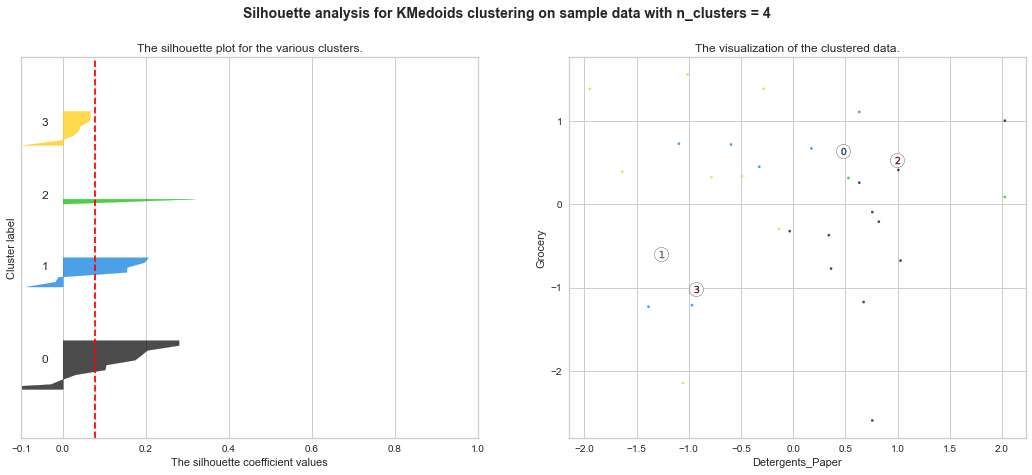

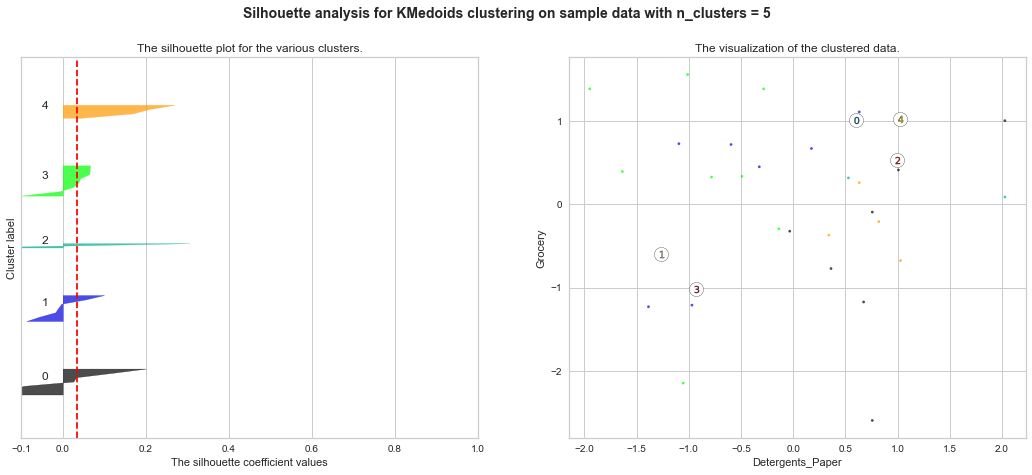

In [96]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_health) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data_health)
    
    #clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    #q, mod = divmod(i, 2)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_health, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_health, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_health.iloc[:,1], data_health.iloc[:,8], marker ='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Detergents_Paper")
    ax2.set_ylabel("Grocery")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**In health, I will choose 3 clusters**

In [97]:
kmedoids1 = KMedoids(n_clusters=3, random_state=0).fit(data_health)
kmedoids1.labels_

array([1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 2, 2, 0])

In [98]:
data_after_scaling['KMedoids_Health']=kmedoids1.labels_

In [99]:
data_after_scaling[data_after_scaling.KMedoids_Health == 1]

,geo,Country,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,...,personnel_2014,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019,KMedoids_labels,KMedoids_Health
0,AT,Austria,-1.271354,-0.596124,-0.487321,0.647228,-0.616332,0.119167,-0.175130,-0.066471,...,2.866900,2.812849,1.476697,1.392267,0.454833,0.259317,-0.896407,0.878553,1,1
6,DK,Denmark,-1.349477,-0.970745,1.108262,-0.146453,-1.007274,0.870667,-0.655553,0.184075,...,0.741785,0.883163,-1.494171,-1.432962,0.755194,1.081217,-0.698579,1.459471,1,1
11,FI,Finland,0.473386,0.819113,2.318705,-0.212593,1.338378,0.509947,0.736018,0.085646,...,-0.478515,-0.406060,-0.376674,-0.826616,0.534929,0.916837,-0.624394,1.074680,2,1
12,FR,France,-1.479681,-1.636739,1.438383,1.771610,0.109703,0.179287,-1.053145,-1.014967,...,-0.686172,-1.052054,0.634857,0.565840,-0.446251,0.259317,0.290560,0.775862,1,1
18,LU,Luxembourg,-1.271354,-1.386991,0.448021,0.911788,-1.398216,0.870667,-1.218808,1.034141,...,-1.069300,-0.423418,-0.059384,-0.283869,-0.346131,1.081217,-1.465162,2.904305,1,1
21,NL,Netherlands,-0.906781,-1.053995,0.668102,0.911788,-0.728030,0.359647,-1.119410,0.470413,...,-0.080841,-0.079285,-0.974235,-1.067554,1.115628,1.574357,-1.440433,0.790888,1,1


# Clusters for economy data

In [100]:
data_economy = data_after_scaling[economy]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.20532607607501924
For n_clusters = 3 The average silhouette_score is : 0.21694721313900298
For n_clusters = 4 The average silhouette_score is : 0.1280352295478015
For n_clusters = 5 The average silhouette_score is : 0.08518597267487482


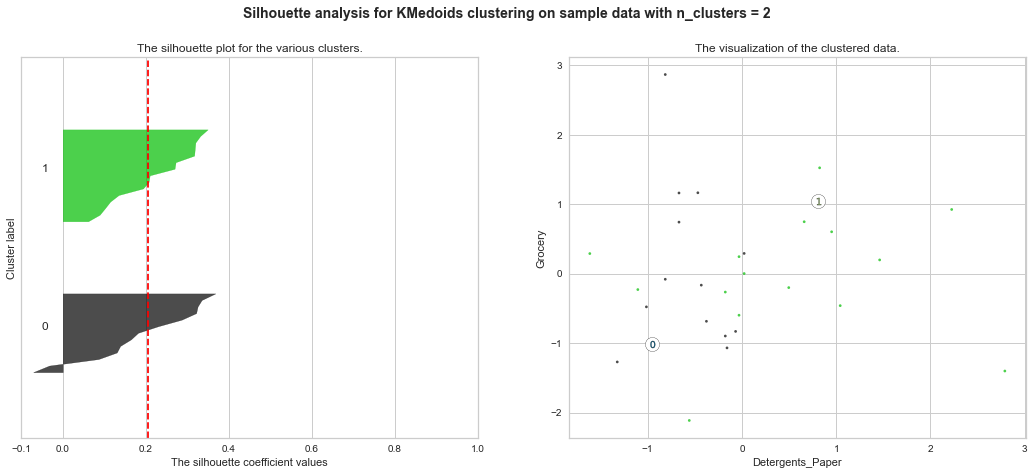

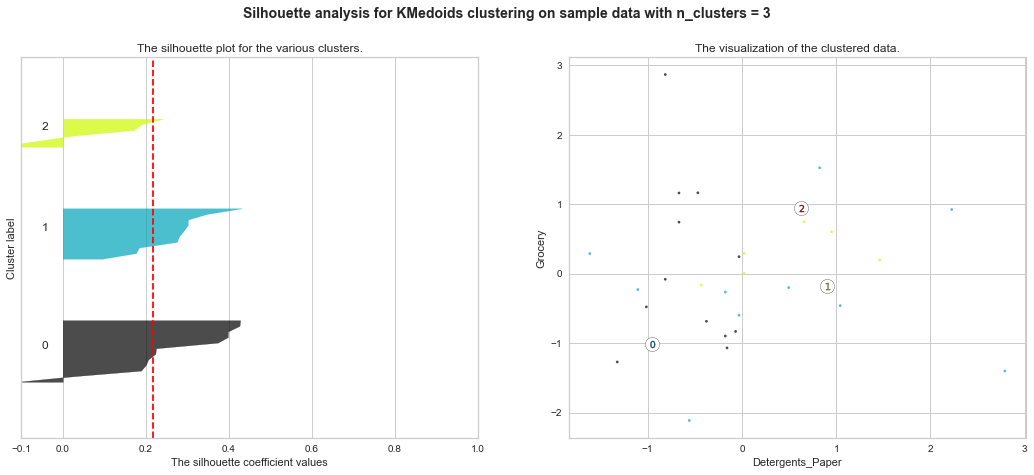

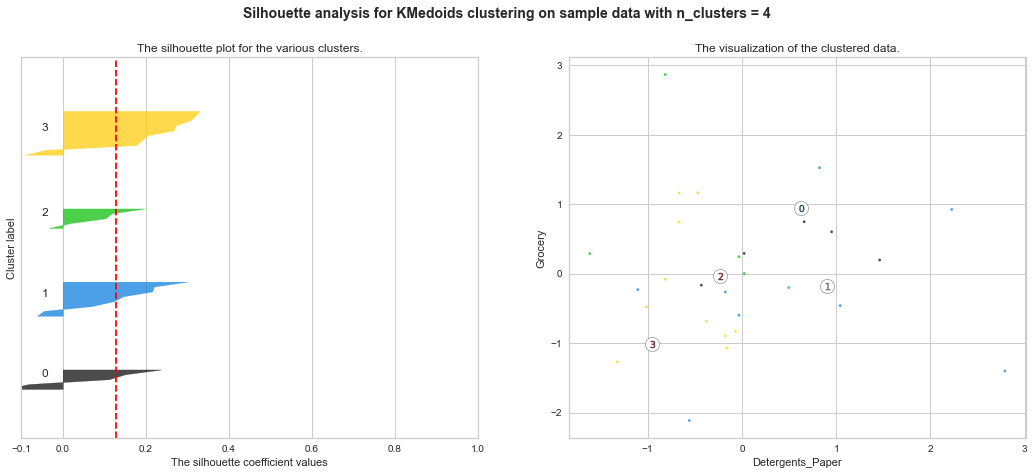

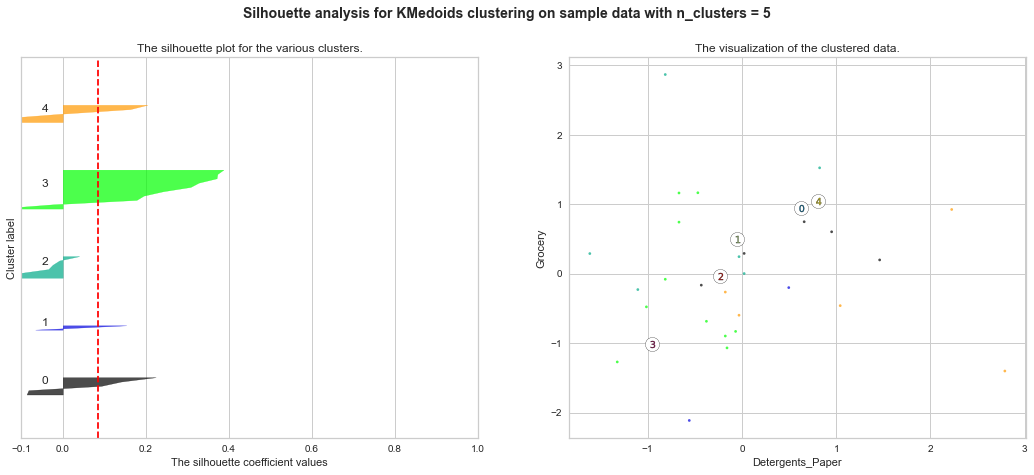

In [101]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_economy) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data_economy)
    
    #clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    #q, mod = divmod(i, 2)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_economy, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_economy, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_economy.iloc[:,1], data_economy.iloc[:,8], marker ='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Detergents_Paper")
    ax2.set_ylabel("Grocery")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



**In economy, I will choose 4 clusters**



In [102]:
kmedoids2 = KMedoids(n_clusters=4, random_state=0).fit(data_economy)
kmedoids2.labels_

array([2, 3, 1, 0, 2, 3, 3, 2, 0, 0, 0, 3, 3, 1, 1, 3, 0, 1, 3, 1, 2, 3,
       1, 2, 1, 3, 3, 1])

In [103]:
data_after_scaling['KMedoids_Economy']=kmedoids2.labels_

In [104]:
data_after_scaling

,geo,Country,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,Fruit_0_day,...,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019,KMedoids_labels,KMedoids_Health,KMedoids_Economy
0,AT,Austria,-1.271354,-0.596124,-0.487321,0.647228,-0.616332,0.119167,-0.175130,-0.066471,...,2.812849,1.476697,1.392267,0.454833,0.259317,-0.896407,0.878553,1,1,2
1,BE,Belgium,-0.932822,-1.012370,0.337981,0.250387,-0.728030,0.059046,-0.904048,-1.712916,...,-1.079331,0.425292,0.392381,-0.806685,0.259317,-0.006182,0.490378,1,2,3
2,BG,Bulgaria,0.291100,-0.034192,-1.642744,-0.278733,-0.113692,-1.323715,1.133610,0.944661,...,0.925000,1.201101,1.572637,0.034327,-2.206385,1.156056,-1.215361,0,0,1
3,CY,Cyprus,-1.193231,-1.095619,-0.652381,-0.477154,-0.057843,-0.722514,-0.655553,-0.299121,...,0.659783,-1.052950,-1.086894,0.234568,0.259317,0.438930,0.221611,1,2,0
4,CZ,Czechia,1.020245,1.027236,-0.322261,-0.940134,0.947436,-0.812695,0.570355,1.043089,...,0.594170,0.925868,0.996120,1.155676,-0.233824,0.092732,-0.723302,3,0,2
5,DE,Germany,-0.203677,-0.325564,1.548423,1.507049,0.891587,1.351628,0.553788,-0.299121,...,1.097879,1.867727,1.823882,1.215748,1.081217,-0.871679,0.682923,1,0,3
6,DK,Denmark,-1.349477,-0.970745,1.108262,-0.146453,-1.007274,0.870667,-0.655553,0.184075,...,0.883163,-1.494171,-1.432962,0.755194,1.081217,-0.698579,1.459471,1,1,3
7,EE,Estonia,0.265059,0.340430,-0.597361,-0.741714,-0.616332,-0.031134,0.073365,0.255659,...,-0.427255,-0.155032,-0.266954,1.135652,0.259317,-0.302924,-0.604192,0,0,2
8,EL,Greece,0.994204,0.527741,-1.037522,-1.138554,0.500645,-0.993055,-0.539589,-0.308069,...,0.110108,-0.554073,-0.471393,-2.668924,-1.548864,1.947367,-0.915150,2,0,0
9,ES,Spain,-0.125554,-0.283939,-0.597361,-0.609434,0.221401,-0.421914,-0.589288,-1.176032,...,0.563207,-1.325755,-1.214820,-1.307287,0.423697,0.785129,-0.012925,1,2,0


In [105]:
data_after_scaling.to_csv('df_with_clusters',index=False)

<AxesSubplot:>

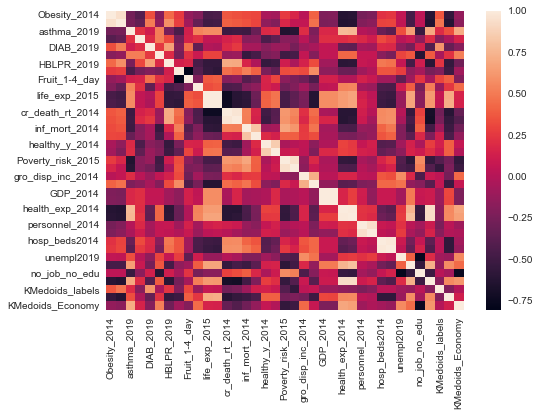

In [106]:
sns.heatmap(data_after_scaling.iloc[:,2:].corr())